# Network_traffic_classification

**Author:** Marco Antonio García Sánchez  
**Objective:** Explore, clean, and prepare the KDDTrain+ dataset for intrusion detection using machine learning models.  
**Dataset:** [KDDTrain+ ARFF Dataset](https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) – 125,973 network connection records labeled as `normal` or `anomaly`.

---

**Original source / credit:**  
This notebook is based on the Udemy course: **"Machine Learning y Data Science: Curso Completo con Python"**  
- **Instructor:** [Santiago Hernández](https://www.udemy.com/user/shramos/) – Expert in Cybersecurity and Artificial Intelligence  
- **Website:** [techmind.ac](https://techmind.ac/)  
- **Course URL:** [udemy.com/course/machine-learning-desde-cero/learn/lecture/19203726](http://udemy.com/course/machine-learning-desde-cero/learn/lecture/19203726)  

**Modifications and improvements:**  
- Reorganized sections for clarity and reproducibility.  
- Added **detailed Markdown documentation** in English and Spanish.  
- Performed **data cleaning**: removed quotes and spaces, converted `bytes` columns to `string`.  
- Transformed **categorical variables** (`protocol_type`, `service`, `flag`, `class`) to numeric values using `LabelEncoder`.  
- Conducted **exploratory data analysis (EDA)** with histograms, scatter matrices, and correlation heatmaps to understand feature distributions and relationships.  
- Identified **strongly correlated features** to guide feature selection and model design.  
- Prepared the dataset for **future modeling**: splitting into training/test sets, preprocessing pipelines, and model training.  
- Standardized code and documentation for **GitHub repository presentation**.

---

This notebook is part of my **Machine Learning portfolio on GitHub** and demonstrates the full workflow from raw email data to a trained predictive model.

### KDD ’99 and NSL-KDD Datasets  

#### About the KDD ’99 Dataset  

The **KDD ’99 dataset** is one of the most widely used benchmark datasets in cybersecurity research, especially for evaluating machine learning–based **Intrusion Detection Systems (IDS)**. It was introduced as part of the **KDD Cup 1999 competition**, associated with the annual KDD conference ([kdd.org](https://www.kdd.org/kdd-cup/view/kdd-cup-1999/Tasks), [tensorflow.org](https://www.tensorflow.org/datasets/catalog/kddcup99)).  

This dataset was derived from the **DARPA’98 IDS evaluation program** at MIT Lincoln Labs, where military network traffic was simulated under both normal conditions and different cyberattack scenarios. The raw network traffic was captured, then processed into **connection records**, each containing **41 features** extracted from the traffic plus a label indicating whether it was normal or an attack ([kdd.org](https://www.kdd.org/kdd-cup/view/kdd-cup-1999/Tasks), [cs.dal.ca](https://www.cs.dal.ca/~zincir/bildiri/pst05-gnm.pdf)).  

The attacks are grouped into four major categories:  
- **DoS** (Denial of Service)  
- **R2L** (Remote to Local)  
- **U2R** (User to Root)  
- **Probe** (scanning/port probing)  

---

#### Limitations of KDD ’99  

Despite its popularity, the KDD ’99 dataset suffers from several serious flaws:  

- **Excessive redundancy**: about 78% of training records and 75% of test records are duplicates, which biases models toward frequent patterns and makes it harder to detect rare but critical attacks like U2R or R2L.  
- **Unrealistic class distribution**: certain attacks (*smurf*, *neptune*) dominate the dataset, making it unbalanced and not representative of real-world traffic.  
- **Unreliable evaluations**: many studies report very high accuracy (> 98%), but this is largely due to duplicates in both training and test sets. As a result, results are often misleading and hard to compare fairly across research.  

---

#### Transition to NSL-KDD  

To address these issues, the **NSL-KDD dataset** was proposed as an improved version of KDD ’99. While it is **not perfect** and still not a complete representation of real-world network traffic, it offers important advantages:  

1. **Reasonable training and test sizes** – large enough to be meaningful, small enough to handle without subsampling.  
2. **No need for random data reduction** – the entire dataset can be used in experiments.  
3. **Consistent benchmarking** – results are more reliable and comparable across research studies.  

Thus, NSL-KDD remains one of the **standard benchmark datasets** in academic research for testing and comparing intrusion detection methods.  

---

#### Quick Comparison  

| Feature                | KDD ’99                          | NSL-KDD                          |
|-------------------------|----------------------------------|----------------------------------|
| Release year            | 1999 (KDD Cup)                  | 2009                             |
| Origin                  | DARPA’98 IDS evaluation          | Improved version of KDD ’99      |
| Features per record     | 41                               | 41                               |
| Data issues             | High redundancy, skewed classes | Reduced redundancy, better balance |
| Realism                 | Low (synthetic, biased)          | Moderate (still synthetic)        |
| Usage today             | Historical baseline              | Standard academic benchmark       |

---

#### Dataset Download

The NSL-KDD dataset can be downloaded from the official repository:  
[NSL-KDD Dataset – UNB](https://iscxdownloads.cs.unb.ca/iscxdownloads/NSL-KDD/#NSL-KDD)

https://github.com/jmnwong/NSL-KDD-Dataset

---

#### References

M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani,  
**“A Detailed Analysis of the KDD CUP 99 Data Set,”**  
Submitted to *Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA)*, 2009.  

## 1. Data Import Strategies

### Import .txt

**Why the DataFrame Lacks Column Names**

When loading the NSL-KDD dataset into a Pandas DataFrame directly from the raw .txt file, the resulting DataFrame does not include column names. Instead, Pandas interprets the first row of the file as data values, assigning default numerical indices (0, 1, 2, …) as column headers.

**This happens because:**
	1.	The dataset files do not provide a header row — the NSL-KDD .txt files contain only the records without attribute names.
	2.	Pandas defaults — if no header is explicitly specified, Pandas assumes the first line is data and auto-generates integer column labels.
	3.	KDD dataset format — unlike modern datasets that include descriptive headers (CSV, ARFF with metadata), the KDD family datasets were designed for benchmarking ML algorithms and often ship with a separate documentation file listing the features.

To resolve this, we must manually provide the column names when reading the dataset.

In [11]:
with open("/Users/marco/Desktop/GitRepositorios/Datasets/KDDTrain+/KDDTrain+.txt") as train_set:
    df = train_set.readlines()
import pandas as pd
df = pd.read_csv("/Users/marco/Desktop/GitRepositorios/Datasets/KDDTrain+/KDDTrain+.txt")
df

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


### Import ARFF

An **ARFF** (Attribute-Relation File Format) file is a plain text ASCII file specifically designed to represent datasets for machine learning tasks. Each ARFF file contains a set of instances (data points) and their corresponding attributes (features), along with a clear description of the dataset structure, including data types and possible values. ARFF files were developed by the Machine Learning Project at the Department of Computer Science, University of Waikato, to facilitate the use of the Weka machine learning software. They provide a standardized and human-readable format that allows researchers and practitioners to store, share, and preprocess datasets efficiently.

For more information, please refer to: Weka ARFF documentation

#### Installing External Packages in a Machine Learning Environment

To work with ARFF files in Python, we need to install the external package `liac-arff`.  

#### Recommended Steps (Using a Dedicated Environment)

It is highly recommended to use a dedicated Python environment for reproducibility and isolation of dependencies. For example, in this project, we use `machine_learning_env`.

```bash
# Create a dedicated Python environment (if not already created)
conda create -n machine_learning_env python=3.9

# Activate the environment
conda activate machine_learning_env

# Install liac-arff package optional or use scipy
pip install liac-arff

## 2. Reading the NSL-KDD ARFF Dataset

The NSL-KDD dataset is provided in ARFF (Attribute-Relation File Format), which is commonly used in machine learning, especially with Weka. To load this dataset in Python, we use the `scipy.io.arff` module rather than the `liac-arff` library. This is because `scipy` handles nominal attributes more robustly and allows a smoother integration with `pandas` DataFrames.

In [16]:
import re
from scipy.io import arff
import pandas as pd

input_file = '/Users/marco/Desktop/GitRepositorios/Datasets/KDDTrain+/KDDTrain+.arff'
clean_file = '/Users/marco/Desktop/GitRepositorios/Datasets/KDDTrain+/KDDTrain+_clean.arff'

with open(input_file, 'r') as f:
    lines = f.readlines()

clean_lines = []
pattern = re.compile(r"@ATTRIBUTE\s+(\w+)\s+\{(.+)\}")

for line in lines:
    match = pattern.match(line.strip())
    if match:
        attr_name = match.group(1)
        values = match.group(2)
        # Remove quotes and leading/trailing spaces from each attribute value
        values = ",".join([v.strip().replace("'", "").replace('"', '') for v in values.split(',')])
        clean_line = f"@ATTRIBUTE {attr_name} {{{values}}}\n"
        clean_lines.append(clean_line)
    else:
        # Clean data rows: remove quotes and spaces
        if line.strip() and not line.startswith('%') and not line.lower().startswith('@relation') and not line.lower().startswith('@data'):
            line = ",".join([v.strip().replace("'", "").replace('"', '') for v in line.strip().split(',')]) + "\n"
        clean_lines.append(line)

# Save the cleaned ARFF file
with open(clean_file, 'w') as f:
    f.writelines(clean_lines)

# Load the cleaned dataset using scipy
data = arff.loadarff(clean_file)
df = pd.DataFrame(data[0])

# Convert columns of type bytes to strings
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Inspect the first rows of the dataset
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


## 3. Data Visualization Functions and Correlation Analysis

Data visualization should always be performed on the training set, keeping the test set completely separate. This prevents introducing any bias or prior knowledge from the test set into the model, which could lead to overfitting and unrealistic performance estimates.

A best practice is to create a copy of the training set and perform all manipulations on that copy. By doing so, any exploratory transformations, feature engineering, or temporary modifications will not affect the original training data. This ensures that the original dataset remains intact for later stages of the workflow, such as model training and validation. Working on a copy allows for safe experimentation and iteration without risking corruption of the core dataset.

#### DataFrame Information

By applying `df.info()` to the NSL-KDD dataset loaded into a **Pandas DataFrame**, we obtain a structured summary of the columns and data types:

1. **Number of rows (`entries`)**:  
   The DataFrame contains **125,973 records**, corresponding to network traffic events in the training set.

2. **Number of columns (`columns`)**:  
   There are **42 columns** representing both network traffic features and the target label (`class`) indicating whether the record corresponds to normal traffic or an attack.

3. **Data types (`dtypes`)**:  
   - **`float64` (34 columns)**: Continuous numerical variables such as `duration`, `src_bytes`, `dst_bytes`, and metrics related to error rates and connection counts (`serror_rate`, `count`, etc.).  
   - **`object` (8 columns)**: Categorical or binary variables, including `protocol_type`, `service`, `flag`, `class`, and some control variables (`land`, `logged_in`, `is_host_login`, `is_guest_login`). These columns may require encoding for machine learning models.

4. **Non-null values (`Non-Null Count`)**:  
   All columns contain **125,973 non-null values**, indicating there are no missing entries in this dataset.

5. **Memory usage**:  
   The DataFrame occupies approximately **40.4 MB** in memory. This provides insight into the dataset size and its manageability for exploratory analysis and model training.

---

#### Interpretation and Relevance

- The dataset combines **numerical and categorical attributes**, making it suitable for supervised classification techniques such as Random Forest, SVM, or neural networks.  
- The `class` column is the **target variable**, essential for building intrusion detection models.  
- The absence of missing values simplifies **data preparation**, although categorical columns still require **preprocessing** (e.g., one-hot encoding or label encoding).  
- Understanding data types and memory usage is useful for planning **feature engineering, transformations, and model training**, especially for large datasets like this one.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

#### Statistical Summary of the Dataset

By applying `df.describe()` to the numerical columns of the NSL-KDD dataset, we obtain a statistical overview of the features. This summary includes measures of central tendency, dispersion, and range for each numerical attribute.

##### Key Metrics:

1. **Count**:  
   - All numerical columns have **125,973 entries**, confirming there are no missing values in these features.

2. **Mean**:  
   - Provides the **average value** for each feature.  
   - For example, `duration` has a mean of approximately **287.14**, and `src_bytes` has a mean of **45,566**.

3. **Standard Deviation (`std`)**:  
   - Measures the **spread of the data** around the mean.  
   - Some features, like `src_bytes` and `dst_bytes`, have very high standard deviations due to large outliers, indicating the presence of extremely large values in certain network traffic events.

4. **Min and Max Values**:  
   - Indicate the **range** of each feature.  
   - For example, `duration` ranges from 0 to 42,908, while `hot` ranges from 0 to 77.  
   - These extremes highlight potential outliers that may require preprocessing or scaling.

5. **Quartiles (25%, 50%, 75%)**:  
   - These represent the **distribution of data**:  
     - 25% (first quartile) indicates the value below which 25% of the data falls.  
     - 50% (median) shows the midpoint of the data.  
     - 75% (third quartile) marks the value below which 75% of the data falls.  
   - For instance, `dst_host_srv_count` has a 25th percentile of 10, median of 63, and 75th percentile of 255, showing a skewed distribution with many small values and some very large ones.

---

#### Interpretation and Relevance

- The dataset exhibits **high variability and skewed distributions** for several numerical features.  
- Features like `src_bytes` and `dst_bytes` contain large outliers, which could affect distance-based models or require **log transformation/scaling**.  
- Understanding these statistics is crucial for **feature engineering, normalization, and model selection**.  
- The summary helps to detect anomalies, extreme values, and the overall **range and spread of network metrics**, which are essential when building intrusion detection models.

In [21]:
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Counting Unique Values in a Column

The `df["protocol_type"].value_counts()` function is used to count the number of occurrences of each unique value in the `protocol_type` column. 

This allows us to quickly see the distribution of different network protocols in the dataset. It is useful for exploratory data analysis (EDA), detecting imbalances in categorical variables, and preparing data for visualization.

In [26]:
df["protocol_type"].value_counts()

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

In [28]:
df["class"].value_counts()

class
normal     67343
anomaly    58630
Name: count, dtype: int64

#### Visualizing a Feature with a Histogram

The following code creates a histogram of the `protocol_type` column:

<Axes: >

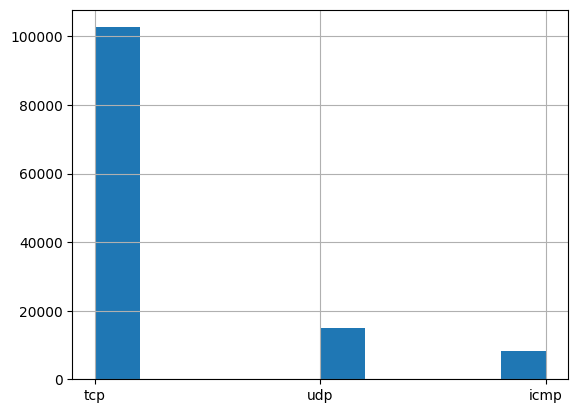

In [31]:
# Mostrar los valores de la característica como un histograma
%matplotlib inline
import matplotlib.pyplot as plt
df["protocol_type"].hist()

#### Importance of Histograms for All Features

Visualizing histograms for all features in a dataset is a crucial step in Exploratory Data Analysis (EDA) for several reasons:

1. **Understanding Data Distribution:**  
   - Histograms show how the values of each feature are distributed.  
   - They help identify whether the data is skewed, uniform, normal, or irregularly distributed.  

2. **Detecting Outliers or Extreme Values:**  
   - Extreme values can impact machine learning models and statistical metrics.  
   - Identifying outliers helps decide whether to filter, transform, or keep them.  

3. **Guiding Transformations or Normalizations:**  
   - Some distributions require scaling (normalization or standardization) before model training.  
   - Features with highly dispersed values may benefit from log transformations or other adjustments.  

4. **Checking Data Consistency:**  
   - Histograms allow spotting errors, such as negative values where they shouldn’t exist, unexpected zeros, or inconsistencies in counts.  

5. **Informing Modeling Strategies:**  
   - The shape of feature distributions can influence which models to use and how to handle certain columns.  
   - For instance, categorical attributes with few unique numeric values may require one-hot encoding.  

**Summary:** Histograms provide a quick and visual understanding of each column's behavior, which is key for making informed decisions before training a machine learning model.

---
The following code generates histograms for all numerical features in the dataset:


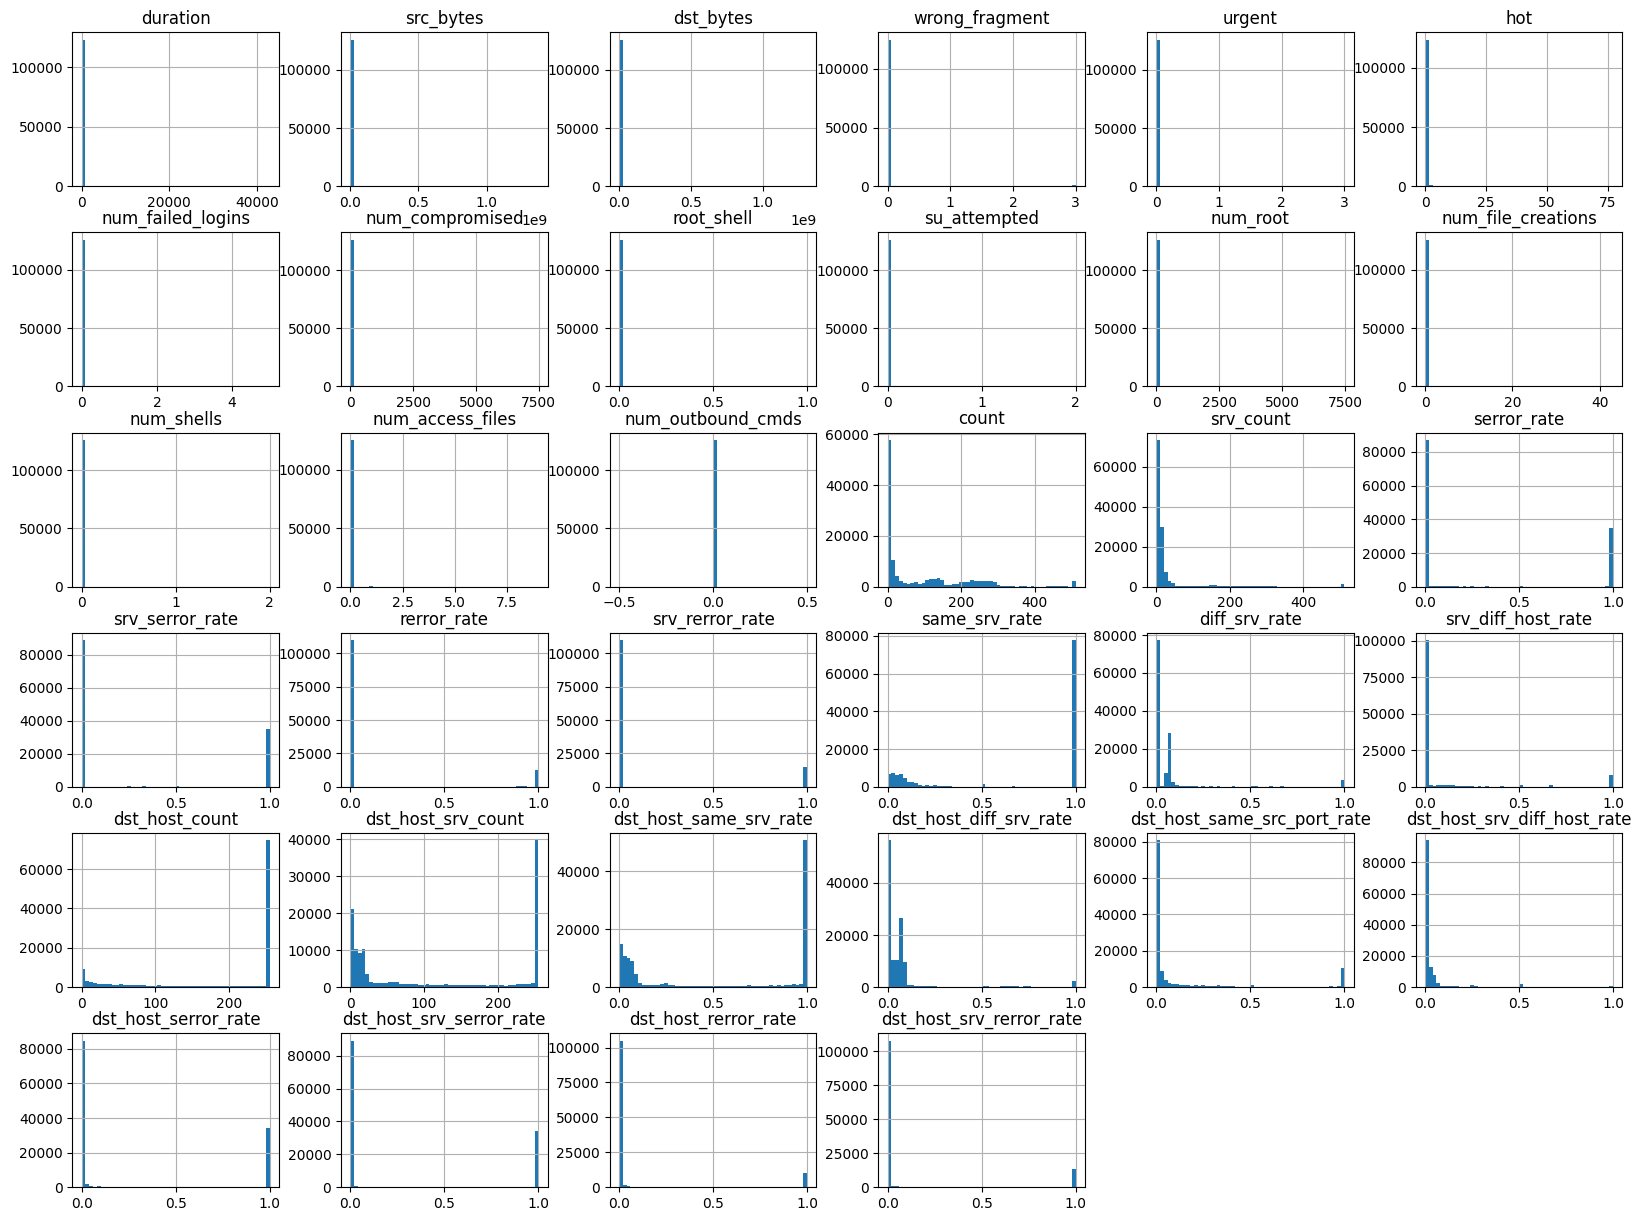

In [34]:
# Representar gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

### Advanced Data Visualization: Exploring Correlations

When working with a dataset, understanding relationships between features is crucial. One way to do this is by calculating the correlation between attributes. Correlation measures how much two variables change together, and it can provide insights into potential predictive power and redundancy between features.

**Key Concepts:**

- **Correlation Coefficient:**  
  The standard correlation coefficient (Pearson's correlation) measures the strength and direction of a linear relationship between two numerical variables.  
  - Values close to `1` indicate a strong positive linear relationship (as `x` increases, `y` tends to increase).  
  - Values close to `-1` indicate a strong negative linear relationship (as `x` increases, `y` tends to decrease).  
  - Values close to `0` indicate little to no linear relationship.

- **Focus on the Target Variable:**  
  In supervised learning tasks, it is especially important to explore correlations with the target variable. In this dataset, the target is the `class` attribute. Understanding which features are most correlated with `class` can help in feature selection, engineering, and understanding the structure of the data.

**Purpose of Advanced Visualization:**  

- Detect highly correlated features, which may introduce redundancy into the model.  
- Identify features with low correlation to the target, which may be less useful for prediction.  
- Reveal patterns and relationships that might not be obvious from basic statistics or histograms.  

By combining correlation analysis with other visualizations (like scatterplots or heatmaps), we gain a deeper understanding of the dataset and can make more informed preprocessing and modeling decisions.

#### Encoding Categorical Variables to Numerical Values

The following code transforms categorical variables into numerical values using `LabelEncoder` from `scikit-learn`. This is a crucial step in the data preprocessing pipeline for machine learning models that require numeric input.

**Why this is necessary:**
	•	Most machine learning algorithms (e.g., logistic regression, SVM, neural networks) cannot handle string or object data directly.
	•	Converting categorical data to numerical values allows models to process these features correctly.
	•	Numeric encoding maintains a clear mapping between categories and model input, enabling predictive modeling without losing information.

In [38]:
from sklearn.preprocessing import LabelEncoder

# Transformamos los valores del atributo class de categoricos a numéricos
labelencoder = LabelEncoder()
df["class"] = labelencoder.fit_transform(df["class"])

# Transformamos los valores de los atributos categóricos a numéricos
df["protocol_type"] = labelencoder.fit_transform(df["protocol_type"])
df["service"] = labelencoder.fit_transform(df["service"])
df["flag"] = labelencoder.fit_transform(df["flag"])

df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,1
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,1
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,0


#### Correlation Analysis with the Target Variable
The following code calculates the pairwise correlation between all numerical features in the dataset and sorts them by their correlation with the target variable `class`:

In [41]:
corr_matrix = df.corr()
corr_matrix["class"].sort_values(ascending=False)

class                          1.000000
same_srv_rate                  0.751913
dst_host_srv_count             0.722535
dst_host_same_srv_rate         0.693803
logged_in                      0.690171
flag                           0.647073
protocol_type                  0.281355
srv_diff_host_rate             0.119377
is_guest_login                 0.039279
num_access_files               0.036701
su_attempted                   0.022448
num_file_creations             0.021271
root_shell                     0.020285
hot                            0.013083
num_root                       0.011452
num_compromised                0.010198
num_shells                     0.009472
num_failed_logins              0.003755
urgent                         0.002787
is_host_login                  0.002629
srv_count                     -0.000771
dst_bytes                     -0.004118
src_bytes                     -0.005921
land                          -0.007191
duration                      -0.048785


In [43]:
#show the correlation between all atribute of data frame
df.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,0.038241,0.092858,-0.063390,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,...,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,-0.048785
protocol_type,0.038241,1.000000,0.029994,0.093668,-0.000974,-0.000608,-0.001757,0.169535,-0.000965,-0.011857,...,0.103919,0.001702,0.131380,-0.209105,-0.356183,-0.079398,-0.077925,-0.015434,-0.046938,0.281355
service,0.092858,0.029994,1.000000,-0.304014,-0.001631,0.003596,-0.009952,0.084404,0.010980,-0.064066,...,-0.407696,-0.452696,0.284072,-0.111163,-0.156211,0.281635,0.277594,0.150666,0.148405,-0.276548
flag,-0.063390,0.093668,-0.304014,1.000000,-0.008114,-0.004096,-0.010373,0.067214,0.005811,0.068437,...,0.582687,0.630118,-0.283607,0.195689,0.073773,-0.443441,-0.443225,-0.683310,-0.718778,0.647073
src_bytes,0.070737,-0.000974,-0.001631,-0.008114,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.005921
dst_bytes,0.034878,-0.000608,0.003596,-0.004096,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.004118
land,-0.001553,-0.001757,-0.009952,-0.010373,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.007191
wrong_fragment,-0.009866,0.169535,0.084404,0.067214,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,...,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,-0.095905
urgent,0.003830,-0.000965,0.010980,0.005811,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,0.002787
hot,0.000705,-0.011857,-0.064066,0.068437,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,...,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,0.013083


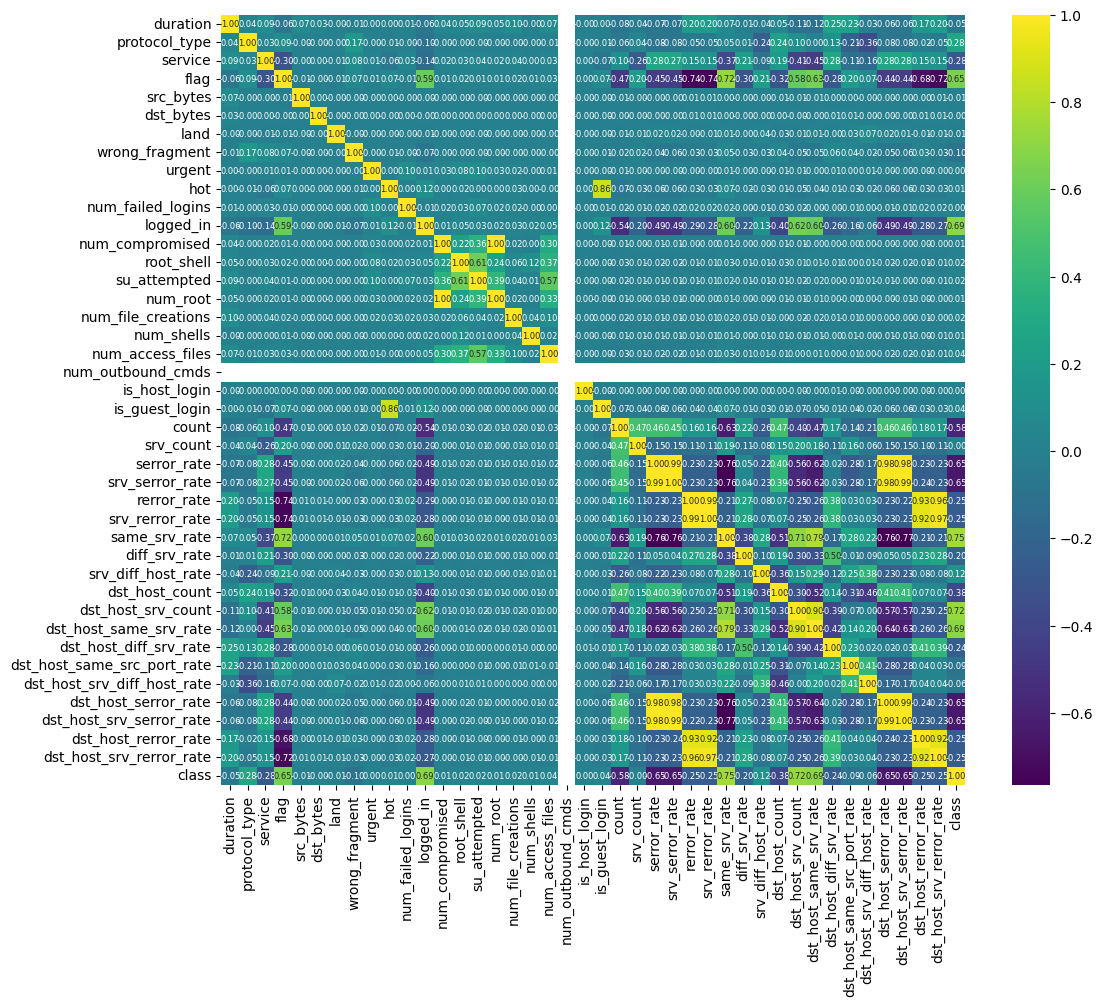

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", cbar=True, annot_kws={"size":6})

# Rotación de etiquetas
plt.xticks(rotation=90)  # eje horizontal vertical
plt.yticks(rotation=0)   # eje vertical horizontal
plt.show()

#### Correlation Matrix Visualization

By plotting the **correlation matrix** as a heatmap, we gain an immediate understanding of how the dataset’s features relate to each other. Each cell shows the **Pearson correlation coefficient** between two variables, ranging from -1 to 1:

- Values close to **1** indicate a strong **positive correlation** (as one variable increases, the other tends to increase as well).
- Values close to **-1** indicate a strong **negative correlation** (as one variable increases, the other tends to decrease).
- Values close to **0** indicate **little or no linear correlation** between the variables.

Colors help quickly identify these relationships. In this case, a **green-to-blue gradient** is used, where more intense shades indicate higher magnitude of correlation.

Rotating the horizontal axis labels vertically (`rotation=90`) improves readability and prevents overlapping, which is especially useful for datasets with many features, like ours (42 columns).

In summary, this visualization allows us to:

- Detect linear patterns between variables.
- Identify features highly correlated with the target variable (`class`), guiding feature selection.
- Facilitate visual exploration of the dataset’s internal structure before applying machine learning models.

#### Analysis of Strongly Correlated Features

The code performs the following steps:

1. **Select a subset of variables:**  
   Only the features of interest (`same_srv_rate`, `dst_host_srv_count`, `class`, `dst_host_same_srv_rate`) are selected for analysis. This reduces noise from irrelevant features and allows us to focus on the most meaningful relationships.

2. **Compute the correlation matrix:**  
   The Pearson correlation coefficient is calculated for each pair of selected features. This coefficient measures linear relationships between two variables, with values ranging from `-1` (perfect negative correlation) to `1` (perfect positive correlation).

3. **Identify strongly correlated pairs:**  
   Pairs of features with an absolute correlation above a threshold (0.6 in this case) are considered strongly correlated. This helps highlight which variables move together in a linear way, either in the same direction (positive) or opposite direction (negative).

4. **Visualize the relationships with scatter plots:**  
   For each strongly correlated pair, a scatter plot is generated showing the individual data points and the strength of correlation. This allows visual inspection of trends, clusters, or outliers.

5. **Optional scatter matrix for all selected variables:**  
   The `scatter_matrix` provides an overview of all pairwise relationships and feature distributions, which is useful for identifying patterns, potential linear correlations, or anomalies.

---

#### Understanding Correlation

- **Correlation meaning:**  
  Correlation quantifies how strongly two variables are linearly related. A high positive correlation means that as one variable increases, the other tends to increase as well. A high negative correlation means that as one variable increases, the other tends to decrease.

- **Importance in data analysis:**  
  - Helps identify which features are closely related to the target variable (`class` in this case), which can be crucial for feature selection in machine learning models.  
  - Reveals redundant features that may provide overlapping information, potentially allowing dimensionality reduction.  
  - Highlights relationships between features that could indicate causal or dependent patterns in the dataset.

Strongly correlated pairs (|corr| >= 0.6):
('dst_host_srv_count', 'same_srv_rate') -> 0.7054097939154708
('class', 'same_srv_rate') -> 0.7519134368764222
('dst_host_same_srv_rate', 'same_srv_rate') -> 0.788977963462947
('class', 'dst_host_srv_count') -> 0.7225353705394971
('dst_host_same_srv_rate', 'dst_host_srv_count') -> 0.8966634699359223
('class', 'dst_host_same_srv_rate') -> 0.6938028328316109


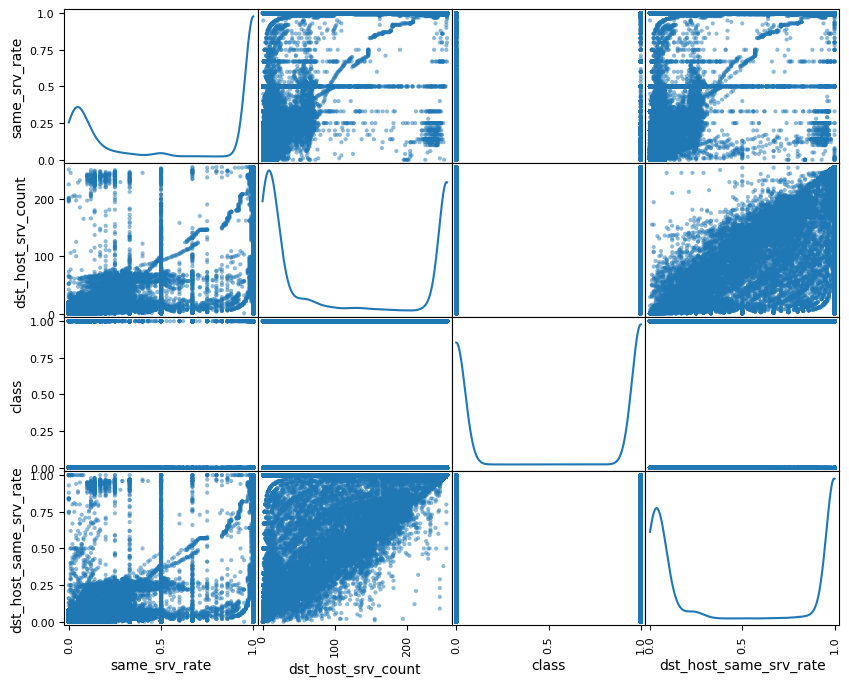

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Seleccionamos solo las columnas de interés
attributes = ["same_srv_rate", "dst_host_srv_count", "class", "dst_host_same_srv_rate"]
subset_df = df[attributes]

# Calculamos la matriz de correlación
corr_matrix = subset_df.corr()

# Definimos umbral para correlación fuerte
threshold = 0.6

# Obtenemos los pares de columnas con correlación fuerte (positiva o negativa)
strong_corr_pairs = []
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            corr_value = corr_matrix.loc[col1, col2]
            if abs(corr_value) >= threshold:
                pair = tuple(sorted((col1, col2)))
                if pair not in strong_corr_pairs:
                    strong_corr_pairs.append(pair)

print("Strongly correlated pairs (|corr| >= 0.6):")
for pair in strong_corr_pairs:
    print(pair, "->", corr_matrix.loc[pair[0], pair[1]])
    
# Alternativamente, podemos usar scatter_matrix para todas las variables seleccionadas
scatter_matrix(subset_df, figsize=(10,8), diagonal='kde')
plt.show()

## 4. Dataset Splitting

Before training a Machine Learning model, it is essential to divide the dataset into **subsets**.  
The goal is to fairly evaluate the model’s performance and reduce the risk of issues such as **overfitting** or **underfitting**.

#### Why split into different subsets?

1. **Training set**  
   - The main dataset used to teach the model patterns.  
   - Model parameters (e.g., weights in logistic regression or neural networks) are learned here.  

2. **Validation set**  
   - Used to tune hyperparameters (e.g., tree depth, learning rate, number of neurons).  
   - Helps detect if the model is starting to memorize the **training set** instead of generalizing.  
   - Prevents **overfitting** by providing an external performance signal during model development.  

3. **Test set**  
   - Reserved until the very end and **must not be used during training or validation**.  
   - Represents “unseen” data, simulating real-world scenarios.  
   - Provides an **unbiased estimate** of the model’s performance.  

#### Risks of not splitting properly

- **Overfitting:**  
  If we only train and test on the same data, the model may “memorize” it, giving artificially high accuracy but failing on new data.  

- **Underfitting:**  
  If the model is too simple or not trained properly, it won’t capture useful patterns, resulting in poor performance even on the training set.  

#### Common split ratios

- **70% training / 15% validation / 15% testing**  
- **60% training / 20% validation / 20% testing**  

In practice, when data is limited, it is common to use only **train/test** (e.g., 80/20).  
However, in more robust projects, adding a **validation set** or using **cross-validation** is highly recommended.

---

> ⚡ In this project, we will use the `train_test_split` function from `sklearn.model_selection`, which allows us to easily divide the dataset into subsets and apply **stratification** to keep class balance across the splits.

In [133]:
#60% train set, 40% test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)
# From test set, 50% validation set, 50% test set
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [135]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 75583
Longitud del Validation Set: 25195
Longitud del Test Set: 25195




## 5. Random Partitioning and Stratified Sampling

When training Machine Learning models, we need to split our dataset into subsets (training, validation, and testing). One of the most commonly used functions for this task is `train_test_split` from **Scikit-learn**.

#### The problem with random partitioning
By default, `train_test_split` performs a **random split** every time the script is executed. This means that if we run the same code multiple times, we’ll get different subsets in each execution.

Even when using a **fixed random seed (`random_state`)**, there’s still a risk that across different dataset loads or separate runs, the model will eventually "see" almost all of the data.  
This undermines the purpose of having separate validation and test sets.

#### Why is this a problem?
- If the dataset changes on every run, model evaluation becomes inconsistent.  
- The model may end up memorizing patterns instead of generalizing, leading to **overfitting**.  
- We can’t properly compare results across experiments, since the evaluation uses different examples each time.

#### Strategies to address this issue
1. **Use a fixed seed (`random_state`)**: ensures reproducibility of the split within the same run.  
2. **Disable shuffling (`shuffle=False`)**: guarantees that the data is always split in the same order, avoiding variability in subsets.  
   However, this can introduce bias if the dataset is ordered (e.g., sorted by class).  
3. **Stratified Sampling**: in classification tasks, using `stratify=y` ensures that class proportions remain consistent across training and test sets. This is crucial when classes are imbalanced.

#### What does the `shuffle` parameter do in `train_test_split`?
The `shuffle` parameter controls whether the data is shuffled before splitting:
- **`shuffle=True` (default):** data is randomly shuffled before splitting, leading to different subsets on each execution.  
- **`shuffle=False`:** data is split in the original order, ensuring the same subsets every time.  

In practice, the best choice depends on the context:
- If the data is well-distributed and not ordered, using `shuffle=True` with a fixed `random_state` is usually best.  
- If the data is ordered or we want maximum reproducibility without variability, we can use `shuffle=False`.  
- For classification tasks, the most robust option is usually `shuffle=True` with `stratify=y`.

In summary, understanding how `train_test_split` and the `shuffle` parameter work is key to controlling dataset splitting, avoiding bias, and ensuring reproducible experiments.

In [71]:
# shuffle=False, The dataset will not be shuffled before splitting
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, shuffle=False)

## 6. Sampling Bias in Dataset Splitting

**Definition:**  
*Sampling bias* occurs when the subsets of data selected for training, validation, or testing **do not faithfully represent the original distribution of the dataset**.  
This leads to models learning incorrect patterns or performing artificially well/poorly on certain subsets.

---

#### Simple Example
Imagine a dataset of **1000 emails**:
- 250 are **SPAM** (25%)  
- 750 are **HAM** (75%)  

If we split the data randomly without preserving proportions:  
- The **training set** might end up with 400 HAM and only 10 SPAM.  
- The **test set** might end up with 350 SPAM and 240 HAM.  

The model would train on very few SPAM examples and fail to generalize because **that class was underrepresented during training**.

---

#### Factors Influencing Sampling Bias
1. **Dataset size**  
   - With large datasets, random splits usually approximate the original distribution well.  
   - With small datasets, the risk of unbalanced subsets is much higher.  

2. **Subset size**  
   - Very small test sets may not capture the dataset’s variability.  
   - Common splits are **70% train, 15% validation, 15% test**, though this depends on the problem.  

3. **Class or feature distribution**  
   - If classes are **imbalanced** (e.g., 90% class A and 10% class B), a random split may nearly eliminate the minority class in one of the subsets.  
   - This prevents the model from learning meaningful patterns for that class.

---

#### How to Avoid Sampling Bias
1. **Stratified Sampling**  
   - Ensures that class proportions are preserved in each subset.  
   - Example: if the full dataset has 25% SPAM and 75% HAM, each subset (train, validation, test) will keep this ratio.  

2. **Using `stratify` in `train_test_split`**  
   - In Scikit-learn, you can pass a reference variable (`y` in classification problems) so each split maintains the class proportions.  

3. **Adequate subset sizes**  
   - Avoid making the test set too small (e.g., only 5% of data), since representation can still be lost even with stratified sampling.  

4. **Cross-validation**  
   - With small datasets, stratified **k-fold cross-validation** is often a better choice than a single split.  
   - This allows the model to see the entire dataset across different train/validation folds, reducing bias risk.  

---

**In summary:**  
Sampling bias arises when subsets don’t reflect the original dataset distribution.  
- In **large datasets**, the risk is low.  
- In **small datasets**, using **stratification** and/or **cross-validation** is critical to prevent biased or useless models.

---

#### Explanation of the Stratified Split Code

The next code splits the DataFrame **df** into two subsets:

- **train_set** → 60% of the data  
- **test_set** → 40% of the data  

It does so in a **stratified** manner with respect to the `protocol_type` column.

---

#### Example of Distribution
If `df["protocol_type"]` has:

- `tcp`: 70%  
- `udp`: 20%  
- `icmp`: 10%  

Then:

- The **train_set** (60% of the total) will approximately preserve `70% tcp, 20% udp, 10% icmp`.  
- The **test_set** (40% of the total) will also maintain that proportion.  

---

This prevents a subset from having very few (or no) `icmp` records, which could introduce **sampling bias** and make it harder for the model to learn patterns for that protocol.

In [96]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, stratify=df["protocol_type"])

In [99]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [101]:
print("Longitud del conjunto de datos original:", len(df))
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type')
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del conjunto de datos original: 125973
Longitud del Training Set: 75583
Longitud del Validation Set: 25195
Longitud del Test Set: 25195


#### Checking the `protocol_type` proportion in the subsets

The histograms show the distribution of the `protocol_type` column:

- **Original Dataset:** represents the distribution of values before splitting the dataset.
- **Train Set, Validation Set, Test Set:** show the distribution after applying stratified splitting.

By visually comparing the histograms of the subsets with the original dataset, we can see that:

1. Each category (`tcp`, `udp`, `icmp`, etc.) roughly maintains the **same proportion** as in the complete dataset.
2. No subset shows **over-representation** or **under-representation** of any category.
3. This confirms that stratification (`stratify`) worked correctly, preventing **sampling bias** in the training, validation, and test sets.

Maintaining these proportions ensures that the model sees representative examples of each category during all stages of training and evaluation.

## 7. Visualization of Proportions

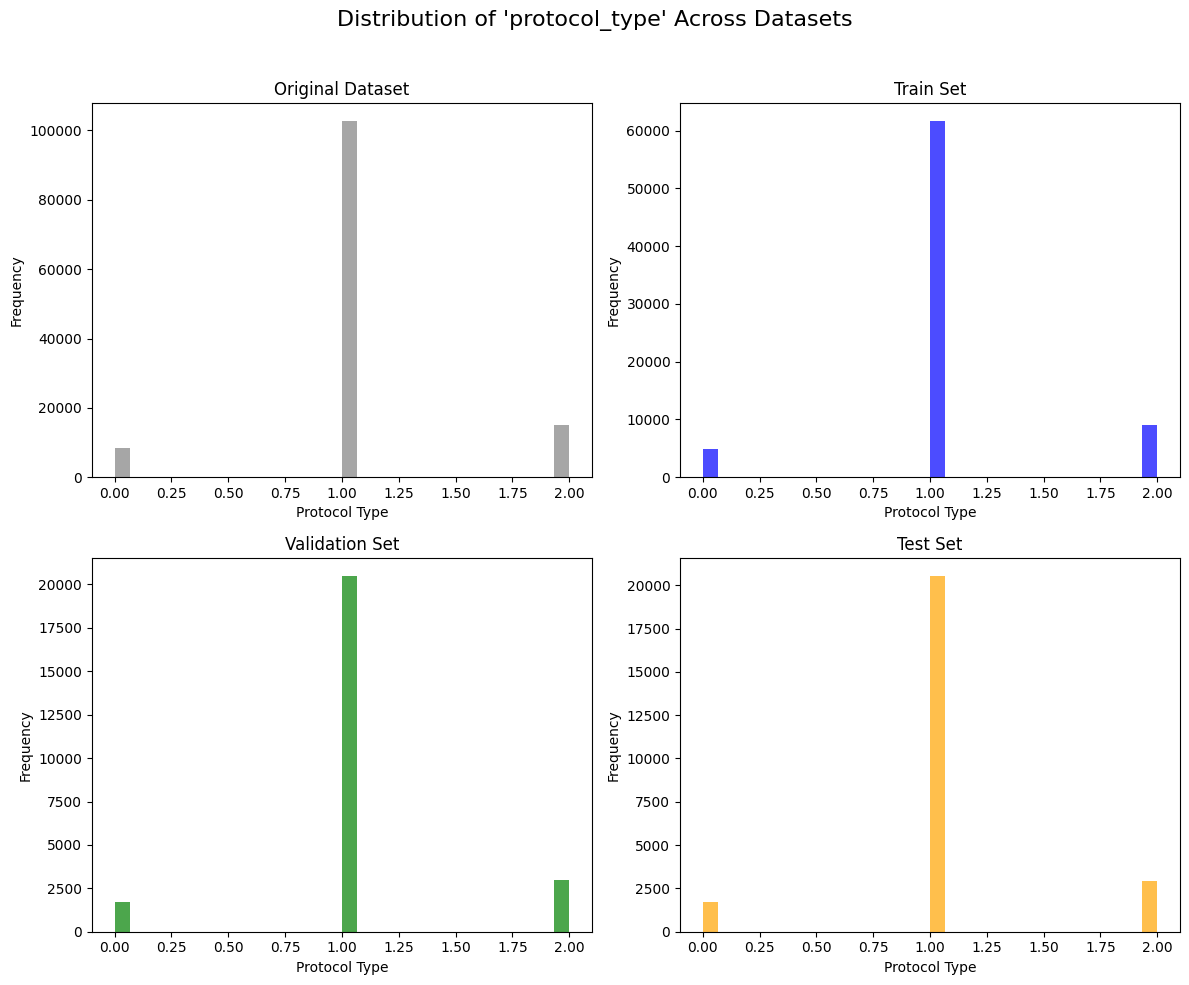

In [150]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle("Distribution of 'protocol_type' Across Datasets", fontsize=16)

# Histograma del dataset completo
axes[0,0].hist(df["protocol_type"], bins=30, color='gray', alpha=0.7)
axes[0,0].set_title("Original Dataset")
axes[0,0].set_xlabel("Protocol Type")
axes[0,0].set_ylabel("Frequency")

# Histograma del train set
axes[0,1].hist(train_set["protocol_type"], bins=30, color='blue', alpha=0.7)
axes[0,1].set_title("Train Set")
axes[0,1].set_xlabel("Protocol Type")
axes[0,1].set_ylabel("Frequency")

# Histograma del validation set
axes[1,0].hist(val_set["protocol_type"], bins=30, color='green', alpha=0.7)
axes[1,0].set_title("Validation Set")
axes[1,0].set_xlabel("Protocol Type")
axes[1,0].set_ylabel("Frequency")

# Histograma del test set
axes[1,1].hist(test_set["protocol_type"], bins=30, color='orange', alpha=0.7)
axes[1,1].set_title("Test Set")
axes[1,1].set_xlabel("Protocol Type")
axes[1,1].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## General Conclusion

This project focused on the exploration, cleaning, transformation, and partitioning of the intrusion detection dataset (`KDDTrain+`) to prepare it for machine learning modeling. Below is a summary of the main phases and activities:

---

### 1. **Data Loading and Cleaning**
- Loaded the `.arff` dataset using `scipy.io.arff` and converted it into a pandas DataFrame.  
- Cleaned the data by removing unnecessary quotes and spaces.  
- Converted columns of type `bytes` into `string` for easier handling.  
- Inspected dataset structure with `df.info()` and `df.describe()` to review types, counts, and descriptive statistics.  

---

### 2. **Categorical Variable Transformation**
- Identified categorical attributes: `protocol_type`, `service`, `flag`, and `class`.  
- Applied `LabelEncoder` to transform them into numeric values.  
- This step enabled:  
  - Compatibility with machine learning algorithms.  
  - Calculation of correlations.  
  - Integration into preprocessing pipelines.  

---

### 3. **Exploratory Data Analysis (EDA)**
- Generated histograms for individual attributes and the full dataset to understand distributions and detect anomalies.  
- Used `value_counts()` to analyze the distribution of categorical variables.  
- Applied scatter matrices (`scatter_matrix`) to observe potential linear relationships.  
- Computed and visualized the correlation matrix with heatmaps, adjusting colors and labels for interpretability.  
- Identified **strongly correlated features** with the target (`class`), such as `same_srv_rate`, `dst_host_srv_count`, and `dst_host_same_srv_rate`.  
- These insights support **feature selection** and detection of redundant variables.  

---

### 4. **Dataset Splitting**
- Partitioned the dataset into three subsets:  
  - **Training set (60%)**: used to fit the model.  
  - **Validation set (20%)**: used for hyperparameter tuning and model selection.  
  - **Test set (20%)**: kept separate for unbiased final evaluation.  
- This structure prevents:  
  - **Overfitting**: the model memorizing training data.  
  - **Underfitting**: the model failing to capture patterns.  

---

### 5. **Random Partitioning vs. Stratified Sampling**
- Random splitting can introduce inconsistencies between runs and risks of **sampling bias**, especially in smaller datasets.  
- To avoid this, **stratified sampling** was applied using the `stratify` parameter in `train_test_split`.  
- Stratification preserved the proportion of categories (e.g., `protocol_type`) across all subsets.  
- Example: if `protocol_type` = {70% tcp, 20% udp, 10% icmp}, then these proportions remain consistent in training, validation, and test sets.  

---

### 6. **Visualization of Proportions**
- Histograms were generated for `protocol_type` across all subsets.  
- The distributions confirmed that stratification preserved the original dataset’s balance.  
- This ensures representativity, allowing the model to generalize better and learn from all categories.  

---

## Final Note
This project successfully established a **clean, well-partitioned dataset**, ready for the next stages of machine learning:  
- Building preprocessing pipelines (normalization, encoding, imputation).  
- Designing and training models.  
- Rigorous validation and evaluation to achieve robust intrusion detection performance.  